In [1]:
import sys
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from preprocessing import get_nn_data
from lstm import build_model, make_pred
from plots_lstm import plot_loss, plot_comp 
from sklearn.metrics import mean_squared_error as mse 

## Neural network model 

Parameters of the models (constants for all cities in this case):

In [2]:
END_TRAIN_DATE = '2021-12-26'
END_DATE = '2023-07-02'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
BATCH_SIZE = 1
EPOCHS =100
HIDDEN = 8
l1 = 1e-6
l2 = 1e-6
lr = 0.0001

Training the models without clusters:

%%time

for CITY in [2704302, 2927408, 2111300, 2211001,
            2800308, 2408102, 2304400, 2507507, 2611606]:
    FILENAME_DATA = f'../../data_single/dengue_{CITY}.csv'
    df = pd.read_csv(FILENAME_DATA)
    cols_to_drop = df.columns[df.columns.str.contains('est')]
    df.drop(cols_to_drop, axis=1, inplace=True)
    FEAT = df.shape[1]

    model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, 
                        predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = lr)


    m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, 
                                                               doenca = 'dengue', epochs = EPOCHS, 
                                                               end_train_date = END_TRAIN_DATE, 
                                                               ratio= None, end_date = END_DATE,
                         predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'single',  filename = FILENAME_DATA)
             
    plot_loss(h_msle_all, title = 'Model loss - MSLE')

Training the models with clusters:

Compilation Time :  0.0017249584197998047
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

Epoch 32/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 0.3089 - mape: 119.3161 - mse: 0.0087 - val_loss: 0.0036 - val_accuracy: 0.2516 - val_mape: 133.9049 - val_mse: 0.0056
Epoch 33/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0042 - accuracy: 0.2721 - mape: 117.9864 - mse: 0.0073 - val_loss: 0.0029 - val_accuracy: 0.3032 - val_mape: 121.3913 - val_mse: 0.0043
Epoch 34/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0046 - accuracy: 0.2678 - mape: 112.1040 - mse: 0.0081 - val_loss: 0.0034 - val_accuracy: 0.3419 - val_mape: 109.1979 - val_mse: 0.0053
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.2937 - mape: 115.8661 - mse: 0.0068 - val_loss: 0.0029 - val_accuracy: 0.3226 - val_mape: 111.1553 - val_mse: 0.0042
Epoch 36/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 0.3110 - mape: 111.7484 - mse: 0.0069 - val_loss:

116/116 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.3261 - mape: 112.0587 - mse: 0.0059 - val_loss: 0.0027 - val_accuracy: 0.2903 - val_mape: 108.7827 - val_mse: 0.0039
Epoch 71/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 0.3434 - mape: 122.2859 - mse: 0.0060 - val_loss: 0.0036 - val_accuracy: 0.2903 - val_mape: 121.2690 - val_mse: 0.0055
Epoch 72/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 0.3348 - mape: 116.2333 - mse: 0.0063 - val_loss: 0.0032 - val_accuracy: 0.2710 - val_mape: 140.0350 - val_mse: 0.0047
Epoch 73/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 0.3110 - mape: 125.3256 - mse: 0.0054 - val_loss: 0.0023 - val_accuracy: 0.3161 - val_mape: 108.4416 - val_mse: 0.0033
Epoch 74/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.3067 - mape: 111.0376 - mse: 0.0058 - val_loss: 0.0027 - val

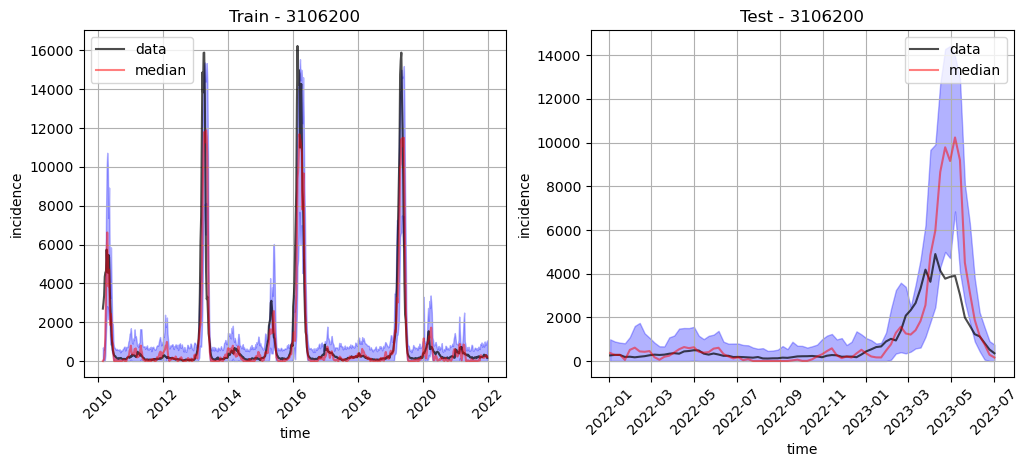

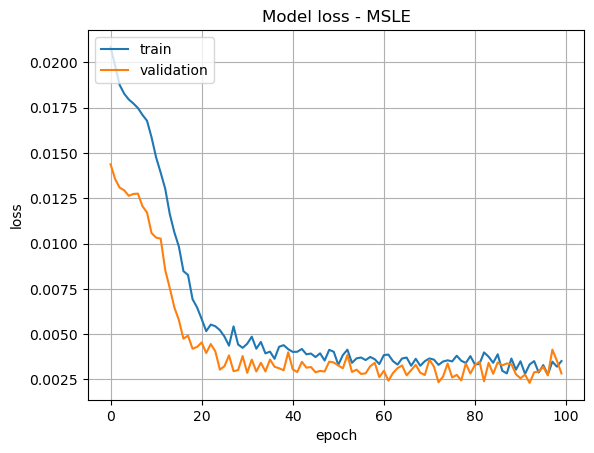

CPU times: user 2min 19s, sys: 6.66 s, total: 2min 25s
Wall time: 2min 13s


In [5]:
%%time

for CITY in [#2704302, 2927408, 2111300, 2211001,
           #2800308,
    3106200
    #2408102, 2304400, 2507507, 2611606
]:
    FILENAME_DATA = f'../../data_cluster/dengue_{CITY}_cluster.csv'
    df = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0')
    cols_to_drop = df.columns[df.columns.str.contains('est')]
    df.drop(cols_to_drop, axis=1, inplace=True)
    cols = df.shape[1]
    FEAT = 51#int((1 + 1 / 16) * cols) + 2

    model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, 
                        predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = lr)


    m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, 
                                                               doenca = 'dengue', epochs = EPOCHS, 
                                                               end_train_date = END_TRAIN_DATE, 
                                                               ratio= None, end_date = END_DATE,
                         predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'cluster',  filename = FILENAME_DATA)
             
    plot_loss(h_msle_all, title = 'Model loss - MSLE')